In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import euclidean

In [2]:
# начальные условия
n1, n2 = 100, 50 # количество объектов наблюдений в классах
a1, a2 = np.array([-1, 1]), np.array([-4,-4]) # вектора мат. ожиданий
r1, r2 = np.array([[2, 1], [1, 1]]), np.array([[2,-1],[-1, 1]]) # корр. матрицы
df1, df2 = np.random.multivariate_normal(a1, r1, n1),\
    np.random.multivariate_normal(a2, r2, n2) 
df1.shape, df2.shape # размерности массивов

((100, 2), (50, 2))

In [3]:
df = np.concatenate((df1, df2))
df.shape # размерность массивов после соединения

(150, 2)

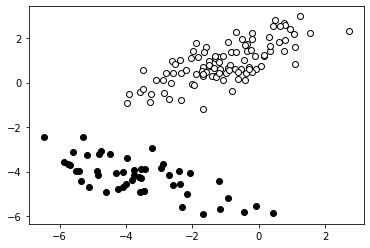

In [4]:
plt.subplot()
plt.scatter(x=df1[:,0], y=df1[:,1], c='white', edgecolors='black')
plt.scatter(x=df2[:,0], y=df2[:,1], c='black')
plt.savefig('data/gendatascatterplot-03.jpeg', dpi=500)
plt.savefig('data/gendatascatterplot-03.svg')

In [5]:
n_cluster = 2
clstr = KMeans(n_clusters=n_cluster, random_state=13).fit(df) # модель
y_predict = clstr.predict(df)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [6]:
centroids = clstr.cluster_centers_ # координаты всех центроид
centroids

array([[-1.01709923,  0.92839855],
       [-3.62778226, -4.16429998]])

In [7]:
labelsclst = clstr.labels_ # кластеры лейблы
labelsclst

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [8]:
clstr.inertia_

415.50619938053865

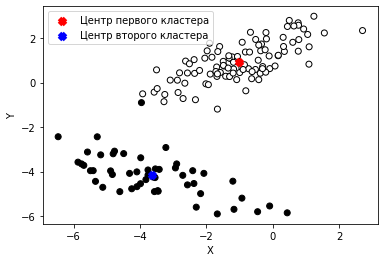

In [9]:
plt.subplot()
plt.scatter(x=df[:,0],y=df[:,1], c=y_predict, cmap=plt.cm.binary, edgecolors='black')
plt.scatter(x=centroids[0,0], y=centroids[0,1], c='red', marker='x',linewidths=5,\
           label='Центр первого кластера')
plt.scatter(x=centroids[1,0], y=centroids[1,1], c='blue', marker='x',linewidths=5,\
            label='Центр второго кластера')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
# plt.show()
plt.savefig('data/gendataclusters-03.jpeg', dpi=500)
plt.savefig('data/gendataclusters-03.svg', dpi=500)

In [10]:
def distance_to_centroid(row, centroid, cols):
    row = row[cols]
    return euclidean(row, centroid)

In [11]:
df = pd.DataFrame(data=df, columns=['x','y'])
df['label'] = clstr.labels_

In [12]:
df['distance_to_center0'] = df[df.label == 0].apply(lambda r: distance_to_centroid(r,centroids[0],['x','y']),1)
df['distance_to_center1'] = df[df.label == 1].apply(lambda r: distance_to_centroid(r,centroids[1],['x','y']),1)

In [13]:
df

,x,y,label,distance_to_center0,distance_to_center1
0,-0.189356,1.962718,0,1.324755,NaN
1,-1.265646,1.075539,0,0.288835,NaN
2,-2.354598,0.411834,0,1.433786,NaN
3,1.053975,2.162079,0,2.410667,NaN
4,-1.681008,0.276251,0,0.930630,NaN
...,...,...,...,...,...
145,-5.186279,-3.250915,1,NaN,1.806429
146,-4.609281,-4.904451,1,NaN,1.229293
147,-3.466597,-4.859659,1,NaN,0.713797
148,-3.221793,-2.920724,1,NaN,1.308170


## Abalone Data

In [14]:
abalone = pd.read_csv('data/abalone.data', usecols=['Sex','Length','Diameter'])
abalone.head()

,Sex,Length,Diameter
0,M,0.455,0.365
1,M,0.350,0.265
2,F,0.530,0.420
3,M,0.440,0.365
4,I,0.330,0.255


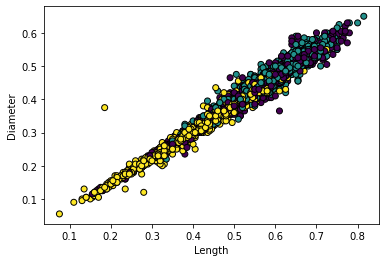

In [15]:
plt.subplot(111)
plt.scatter(x=abalone.Length,y=abalone.Diameter, c=abalone.Sex.map({'M':0,'F':1,'I':2}), edgecolors='black')
plt.xlabel('Length')
plt.ylabel('Diameter')
# plt.show()
plt.savefig('data/abalonebysex.jpeg', dpi=500)
plt.savefig('data/abalonebysex.svg')

In [16]:
n_clst_abalone = abalone.Sex.unique().size

In [17]:
clstabalone = KMeans(n_clusters=n_clst_abalone).fit(abalone[['Length','Diameter']])
y_predict_ab = clstabalone.predict(abalone[['Length','Diameter']])
y_predict_ab

array([0, 2, 0, ..., 1, 1, 1], dtype=int32)

In [18]:
clstabalone.cluster_centers_

array([[0.49244872, 0.38161218],
       [0.62677795, 0.49285374],
       [0.32570548, 0.24436986]])

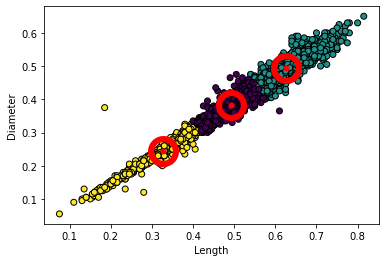

In [19]:
plt.subplot()
plt.scatter(x=abalone.Length,y=abalone.Diameter, c=y_predict_ab, edgecolors='black')
plt.scatter(x=clstabalone.cluster_centers_[:,0],y=clstabalone.cluster_centers_[:,1],\
           c='red', linewidths=25, marker='o')
plt.xlabel('Length')
plt.ylabel('Diameter')
# plt.show()
plt.savefig('data/clusterabalonebysex.jpeg', dpi=500)
plt.savefig('data/clusterabalonebysex.svg')

In [20]:
abalone['label'] = clstabalone.labels_
abalone['distance_to_center0'] = abalone[abalone.label == 0]\
.apply(lambda r: distance_to_centroid(r,clstabalone.cluster_centers_[0],['Length','Diameter']),1)
abalone['distance_to_center1'] = abalone[abalone.label == 1]\
.apply(lambda r: distance_to_centroid(r,clstabalone.cluster_centers_[1],['Length','Diameter']),1)
abalone['distance_to_center2'] = abalone[abalone.label == 2]\
.apply(lambda r: distance_to_centroid(r,clstabalone.cluster_centers_[1],['Length','Diameter']),1)

In [21]:
abalone

,Sex,Length,Diameter,label,distance_to_center0,distance_to_center1,distance_to_center2
0,M,0.455,0.365,0,0.040968,NaN,NaN
1,M,0.350,0.265,2,NaN,NaN,0.358502
2,F,0.530,0.420,0,0.053700,NaN,NaN
3,M,0.440,0.365,0,0.055017,NaN,NaN
4,I,0.330,0.255,2,NaN,NaN,0.380331
...,...,...,...,...,...,...,...
4172,F,0.565,0.450,1,NaN,0.075186,NaN
4173,M,0.590,0.440,1,NaN,0.064390,NaN
4174,M,0.600,0.475,1,NaN,0.032184,NaN
4175,F,0.625,0.485,1,NaN,0.008052,NaN
